In [1]:
import urllib.request

In [2]:
urllib.request.urlretrieve("http://raw.githubusercontent.com/elastic/examples/master/Common%20Data%20Formats/apache_logs/apache_logs","apache_logs")

('apache_logs', <http.client.HTTPMessage at 0x7f6ecc93d0d0>)

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

## Zad. 1

In [4]:
lines = sc.textFile("apache_logs")

In [5]:
ranges = [range(i*50, (i+1)*50) for i in range(5)]
ranges.append(range(250, 256))

In [6]:
#get number of group to which the number belongs (0-49: 1, 50-99: 2, ...)
def get_octet(ip):
    ip_group = int(ip.split('.')[0])
    assert 0 <= ip_group <= 255
    return ip_group//50

In [7]:
import re
import matplotlib.pyplot as plt
import pandas as pd

regex = '([(\d\.)]+)'
ips = lines.map(lambda s: re.match(regex, s).group(0))

ip_groups = ips.map(lambda x: (get_octet(x), 1))
ip_groups_count = ip_groups.reduceByKey(lambda a, b: a + b)
res = ip_groups_count.takeOrdered(6)

In [8]:
df = pd.DataFrame(res, columns=['IP group', 'Count'])
df

,IP group,Count
0,0,1053
1,1,4162
2,2,1560
3,3,1709
4,4,1516


<Axes: ylabel='IP group'>

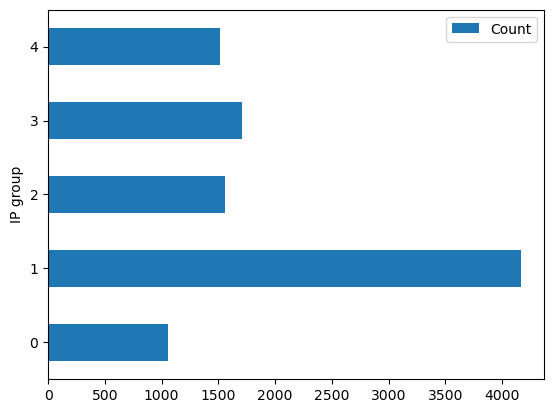

In [9]:
df.plot.barh(x = 'IP group')

## Zad. 2

Brakuje danych

## Zad. 3

In [10]:
from pyspark.sql.functions import col

countries_df = pd.read_csv('countries of the world.csv', decimal=',')
countries_df['Country'] = countries_df['Country'].map(lambda x: x.strip())
spark_countries = spark.createDataFrame(countries_df)
countries_df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


<Axes: xlabel='GDP ($ per capita)', ylabel='Birthrate'>

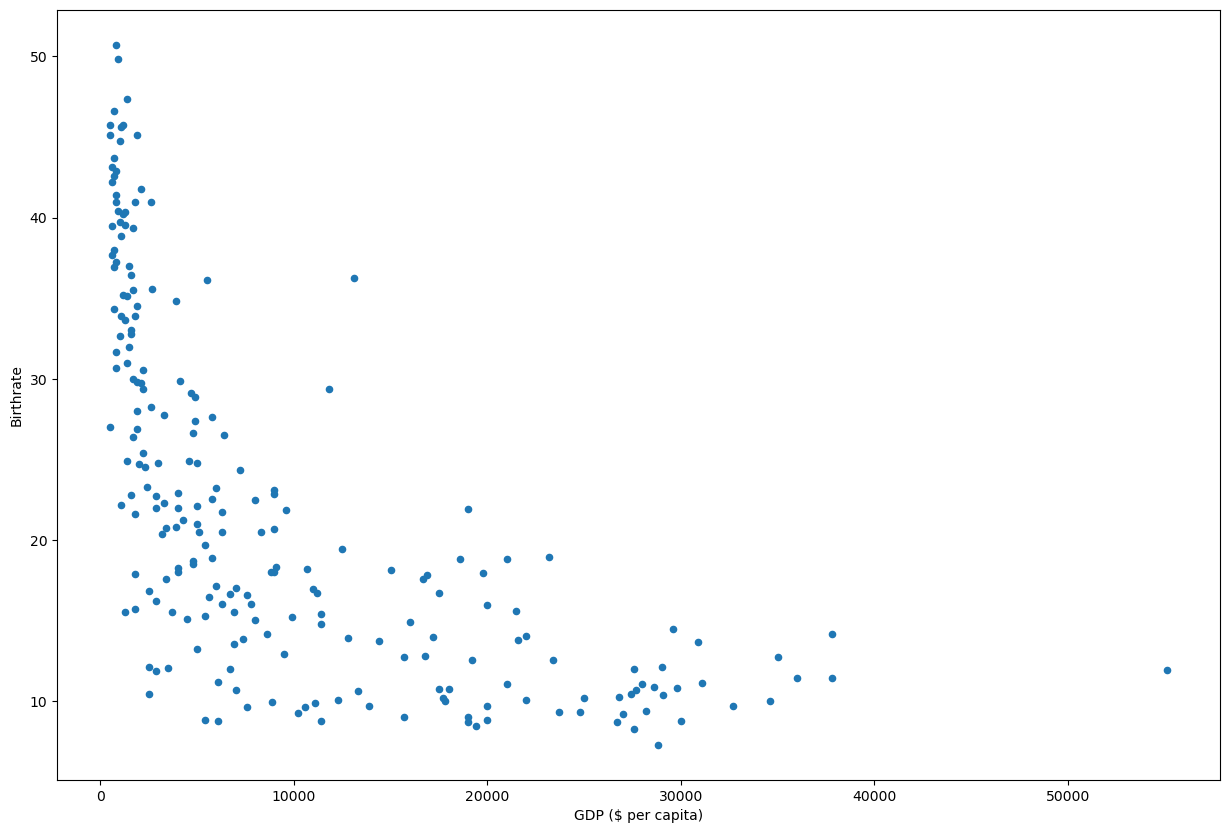

In [11]:
countries_df = countries_df.sort_values('GDP ($ per capita)')
countries_df.plot(x='GDP ($ per capita)', y='Birthrate', kind='scatter', figsize=(15, 10))

<Axes: xlabel='GDP ($ per capita)', ylabel='Deathrate'>

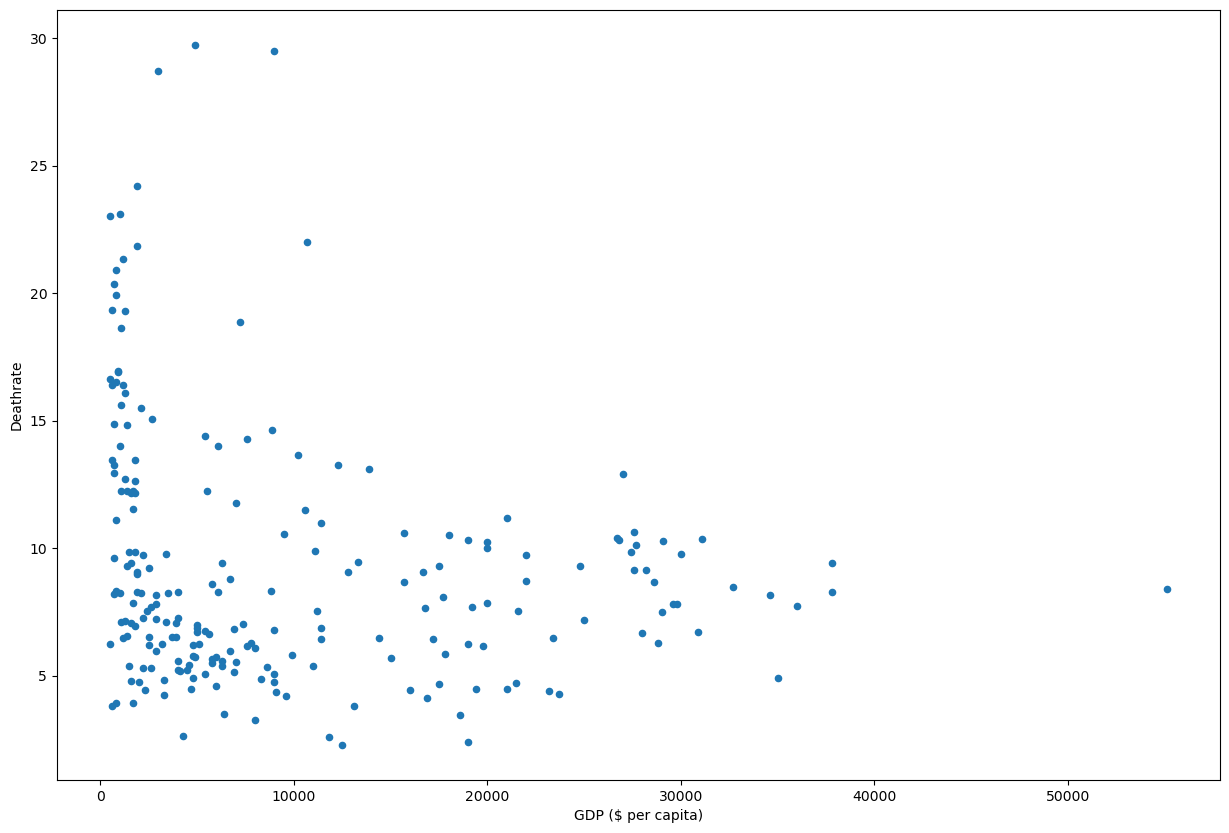

In [12]:
countries_df.plot(x='GDP ($ per capita)', y='Deathrate',kind='scatter', figsize=(15, 10))

## Zad. 4

In [13]:
header = ['Airport ID', 'AirportName', 'City', 'Country', 'IATA', 'ICAO', 'Lattitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database timezone', 'Type', 'Source']
airports = pd.read_csv('airports.csv', names=header)
airports

,Airport ID,AirportName,City,Country,IATA,ICAO,Lattitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179,12053,Rugao Air Base,Rugao,China,RUG,ZSRG,32.257885,120.501656,0,\N,\N,\N,airport,OurAirports
7180,12054,Wuhu Air Base,Wuhu,China,WHU,ZSWU,31.390600,118.408997,0,\N,\N,\N,airport,OurAirports
7181,12055,Shanshan Airport,Shanshan,China,SXJ,ZWSS,42.911701,90.247498,0,\N,\N,\N,airport,OurAirports
7182,12056,Yingkou Lanqi Airport,Yingkou,China,YKH,ZYYK,40.542524,122.358600,0,\N,\N,\N,airport,OurAirports


In [14]:
spark_airports = spark.createDataFrame(airports)
spark_airports.createOrReplaceTempView('airports')

In [15]:
europe_airports = spark_airports.filter(col("DST") ==  "E").select("Longitude", "Lattitude")
europe_airports_pd = europe_airports.toPandas()
europe_airports_pd

,Longitude,Lattitude
0,-45.425999,61.160500
1,-51.678101,64.190903
2,-50.711603,67.012222
3,-68.703201,76.531197
4,10.754700,35.758099
...,...,...
1563,8.878056,50.335835
1564,8.815000,50.874443
1565,9.573333,53.207500
1566,8.947222,53.286667


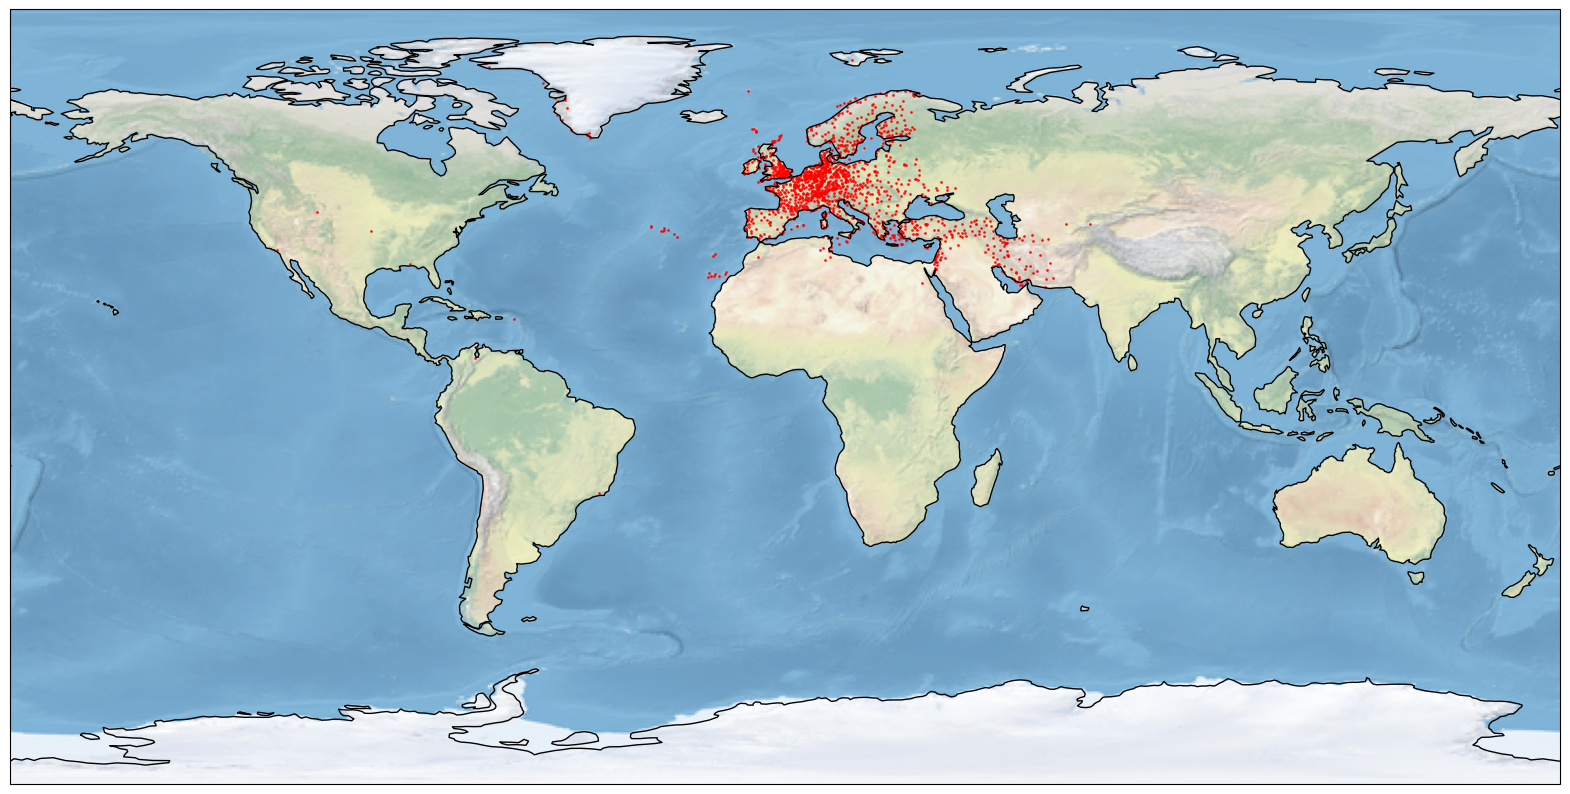

In [16]:
import cartopy.crs as crs

plt.figure(figsize=[20, 20])
ax = plt.axes(projection=crs.PlateCarree())
ax.stock_img()
ax.coastlines()

longs, latts = europe_airports_pd['Longitude'], europe_airports_pd['Lattitude']


plt.scatter(
    x=longs,
    y=latts,
    color="r",
    s=1,
    alpha=0.8,
    transform=crs.PlateCarree()
)

plt.show()

## Zad. 5

In [17]:
query = """
    SELECT a.Country, a.City, a.AirportName, a.Altitude*0.3048 as Altitude FROM airports a
    INNER JOIN (
        SELECT Country, MAX(Altitude) AS max_altitude FROM airports
        GROUP BY Country)
    b ON a.Country = b.Country AND a.Altitude = b.max_altitude
    ORDER BY Country
    """

spark.sql(query).toPandas()

,Country,City,AirportName,Altitude
0,Afghanistan,Bamyan,Bamiyan Airport,2550.2616
1,Albania,Kukës,Kukës Airport,341.3760
2,Algeria,Tamanrasset,Aguenar – Hadj Bey Akhamok Airport,1377.0864
3,American Samoa,Fiti\\'uta,Fitiuta Airport,33.5280
4,Angola,Lubango,Lubango Airport,1761.1344
...,...,...,...,...
240,West Bank,Jerusalem,Jerusalem Airport,757.4280
241,Western Sahara,Smara,Smara Airport,106.6800
242,Yemen,Sanaa,Sana'a International Airport,2199.4368
243,Zambia,Kasompe,Kasompe Airport,1413.0528


## Zad. 6

Korzystając dodatkowo z pliku countries of the world.csv, narysuj wykres scatter plot pokazujący zależność zagęszczenia lotnisk na jednostkę powierzchni od PKB na osobę. 

In [18]:
spark_countries.createOrReplaceTempView('countries')
spark_countries.toPandas()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [19]:
spark_airports.createOrReplaceTempView('airports')
spark_airports.toPandas()

,Airport ID,AirportName,City,Country,IATA,ICAO,Lattitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179,12053,Rugao Air Base,Rugao,China,RUG,ZSRG,32.257885,120.501656,0,\N,\N,\N,airport,OurAirports
7180,12054,Wuhu Air Base,Wuhu,China,WHU,ZSWU,31.390600,118.408997,0,\N,\N,\N,airport,OurAirports
7181,12055,Shanshan Airport,Shanshan,China,SXJ,ZWSS,42.911701,90.247498,0,\N,\N,\N,airport,OurAirports
7182,12056,Yingkou Lanqi Airport,Yingkou,China,YKH,ZYYK,40.542524,122.358600,0,\N,\N,\N,airport,OurAirports


In [20]:
query = """
    SELECT DISTINCT c.Country FROM countries c
    WHERE NOT EXISTS(
        SELECT 1 FROM airports a
        WHERE a.Country=c.Country
    )
    ORDER BY Country
    """

spark.sql(query).toPandas()

,Country
0,Andorra
1,Antigua & Barbuda
2,"Bahamas, The"
3,Bosnia & Herzegovina
4,British Virgin Is.
5,Central African Rep.
6,"Congo, Dem. Rep."
7,"Congo, Repub. of the"
8,"Gambia, The"
9,Gaza Strip


In [21]:
query = """
    SELECT DISTINCT a.Country FROM airports a
    WHERE NOT EXISTS(
        SELECT 1 FROM countries c
        WHERE a.Country=c.Country
    )
    ORDER BY Country
    """

spark.sql(query).toPandas()

,Country
0,Antarctica
1,Antigua and Barbuda
2,Bahamas
3,Bosnia and Herzegovina
4,British Indian Ocean Territory
5,British Virgin Islands
6,Central African Republic
7,Christmas Island
8,Cocos (Keeling) Islands
9,Congo (Brazzaville)


In [22]:
countries_translator = {
    "Antigua and Barbuda": "Antigua & Barbuda",
    "Antigua & Barbuda": "Antigua and Barbuda",
    "Bahamas, The": "Bahamas",
    "Bahamas": "Bahamas, The",
    "Bosnia & Herzegovina": "Bosnia and Herzegovina",
    "Bosnia and Herzegovina": "Bosnia & Herzegovina",
    "British Virgin Islands": "British Virgin Is.",
    "British Virgin Is.": "British Virgin Islands",
    "Central African Rep.": "Central African Republic",
    "Central African Republic": "Central African Rep.",
    "Congo, Repub. of the": "Congo (Brazzaville)",
    "Congo (Brazzaville)": "Congo, Repub. of the",
    "Congo, Dem. Rep.": "Congo (Kinshasa)",
    "Congo (Kinshasa)": "Congo, Dem. Rep.",
    "Gambia": "Gambia, The",
    "Gambia, The": "Gambia",
    "Korea, North": "North Korea",
    "North Korea": "Korea, North",
    "Korea, South": "South Korea",
    "South Korea": "Korea, South",
    "Micronesia": "Micronesia, Fed. St.",
    "Micronesia, Fed. St.": "Micronesia",
    "N. Mariana Islands": "Northern Mariana Islands",
    "Northern Mariana Islands": "N. Mariana Islands",
    "Saint Kitts and Nevis": "Saint Kitts & Nevis",
    "Saint Kitts & Nevis": "Saint Kitts and Nevis",
    "Sao Tome & Principe": "Sao Tome and Principe",
    "Sao Tome and Principe": "Sao Tome & Principe",
    "Saint Pierre and Miquelon": "St Pierre & Miquelon",
    "St Pierre & Miquelon": "Saint Pierre and Miquelon",
    "Trinidad and Tobago": "Trinidad & Tobago",
    "Trinidad & Tobago": "Trinidad and Tobago",
    "Turks & Caicos Is": "Turks and Caicos Islands",
    "Turks and Caicos Islands": "Turks & Caicos Is"
}

In [23]:
countries_df['Country'] = countries_df['Country'].map(lambda x: countries_translator.get(x, x))
spark_countries = spark.createDataFrame(countries_df)
spark_countries.createOrReplaceTempView('countries')

In [24]:
query = """
    SELECT c.Country, (a.airport_count)/`Area (sq. mi.)` as `Airports per sq. mi.`, `GDP ($ per capita)` FROM countries c
    JOIN 
        (
            SELECT Country, COUNT(*) as airport_count FROM airports
            GROUP BY Country
        ) a
    ON c.Country = a.Country
    ORDER BY `GDP ($ per capita)`
    """

res = spark.sql(query).toPandas()
res

,Country,Airports per sq. mi.,GDP ($ per capita)
0,Sierra Leone,0.000098,500.0
1,Somalia,0.000013,500.0
2,East Timor,0.000200,500.0
3,Malawi,0.000068,600.0
4,Burundi,0.000036,600.0
...,...,...,...
217,Bermuda,0.018868,36000.0
218,Norway,0.000188,37800.0
219,United States,0.000149,37800.0
220,Luxembourg,0.000387,55100.0


<Axes: xlabel='GDP ($ per capita)', ylabel='Airports per sq. mi.'>

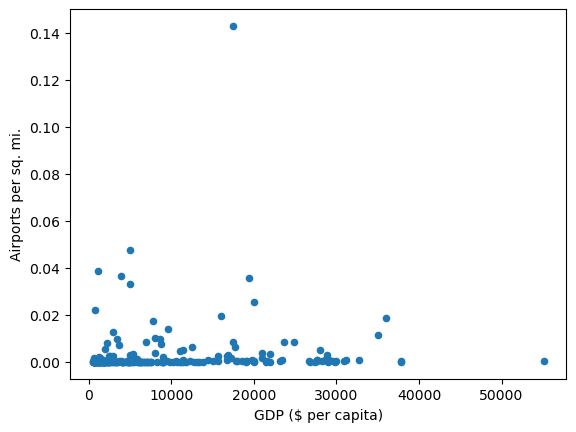

In [25]:
res.plot(x="GDP ($ per capita)", y="Airports per sq. mi.", kind="scatter")